In [74]:
import pandas as pd

In [75]:
df1 = pd.read_csv("SpamAssassin.csv")
df2 = pd.read_csv("Lingspam_Dataset.csv")

In [76]:
df1.dropna(inplace = True)
df2.dropna(inplace = True)

In [77]:
X = df1.copy()
Y = df2.copy().drop(columns = ["subject"])

In [78]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Calculating number of characters,words,sentences

In [79]:
df1['num_characters'] = df1["email"].apply(len)

In [80]:
df1.head()

,email,label,num_characters
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522
1,martin a posted tassos papadopoulos the greek ...,0,643
2,man threatens explosion in moscow thursday aug...,0,1509
3,klez the virus that won t die already the most...,0,1015
4,in adding cream to spaghetti carbonara which ...,0,771


In [81]:
df1["num_words"] = df1['email'].apply(lambda x:len(nltk.word_tokenize(x)))

In [82]:
df1.head()

,email,label,num_characters,num_words
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522,257
1,martin a posted tassos papadopoulos the greek ...,0,643,113
2,man threatens explosion in moscow thursday aug...,0,1509,256
3,klez the virus that won t die already the most...,0,1015,169
4,in adding cream to spaghetti carbonara which ...,0,771,144


In [83]:
df1["num_sentences"] = df1['email'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [84]:
df1.head()

,email,label,num_characters,num_words,num_sentences
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,1522,257,1
1,martin a posted tassos papadopoulos the greek ...,0,643,113,1
2,man threatens explosion in moscow thursday aug...,0,1509,256,1
3,klez the virus that won t die already the most...,0,1015,169,1
4,in adding cream to spaghetti carbonara which ...,0,771,144,1


In [85]:
df2['num_characters'] = df2["message"].apply(len)

In [86]:
df2.head()

,subject,message,label,num_characters
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0,4492


In [87]:
df2["num_words"] = df2['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [88]:
df2.head()

,subject,message,label,num_characters,num_words
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856,584
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435,280
3,risk,a colleague and i are researching the differin...,0,324,60
4,request book information,earlier this morning i was on the phone with a...,0,1046,232
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0,4492,861


In [89]:
df2["num_sentences"] = df2['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [90]:
df2.head()

,subject,message,label,num_characters,num_words,num_sentences
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856,584,22
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435,280,19
3,risk,a colleague and i are researching the differin...,0,324,60,4
4,request book information,earlier this morning i was on the phone with a...,0,1046,232,12
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0,4492,861,58


In [91]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [93]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [94]:
df1['transformed_text'] = df1['email'].apply(transform_text)
df2['transformed_text'] = df2['message'].apply(transform_text)

In [95]:
spam_c = []
for msg in df1[df1['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_c.append(word)

In [96]:
ham_c = []
for msg in df1[df1['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_c.append(word)

In [97]:
spam_ca = []
for msg in df2[df2['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_ca.append(word)

In [98]:
ham_ca = []
for msg in df2[df2['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_ca.append(word)

In [99]:
from collections import Counter
pd.DataFrame(Counter(spam_c).most_common(30))

,0,1
0,number,7392
1,url,1171
2,mail,794
3,hyperlink,787
4,free,717
5,email,641
6,e,550
7,money,548
8,receiv,488
9,get,472


In [100]:
from collections import Counter
pd.DataFrame(Counter(ham_c).most_common(30))

,0,1
0,number,26608
1,url,7524
2,use,2142
3,list,1959
4,get,1466
5,one,1363
6,mail,1359
7,like,1188
8,time,1183
9,messag,1109


In [101]:
from collections import Counter
pd.DataFrame(Counter(spam_ca).most_common(30))

,0,1
0,20,1774
1,order,1593
2,report,1393
3,address,1323
4,mail,1284
5,email,1137
6,000,1120
7,program,1073
8,make,985
9,list,957


In [102]:
from collections import Counter
pd.DataFrame(Counter(ham_ca).most_common(30))

,0,1
0,languag,8251
1,univers,6548
2,linguist,5346
3,paper,3730
4,de,3195
5,inform,2797
6,confer,2673
7,1,2573
8,use,2437
9,00,2244


# Pie Charts of Datasets 

In [103]:
X['label'].value_counts()

0    2500
1     499
Name: label, dtype: int64

([<matplotlib.patches.Wedge at 0x175e371a730>,
 [Text(-0.9531076835670171, 0.5491682288019901, 'ham'),
  Text(0.953107657858596, -0.54916827342018, 'spam')],
 [Text(-0.519876918309282, 0.29954630661926734, '83.36'),
  Text(0.5198769042865069, -0.29954633095646177, '16.64')])

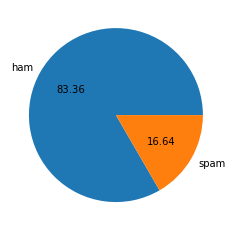

In [104]:
import matplotlib.pyplot as plt
plt.pie(X['label'].value_counts(),labels = ["ham","spam"],autopct = "%0.2f")

In [105]:
Y['label'].value_counts()

0    2363
1     468
Name: label, dtype: int64

([<matplotlib.patches.Wedge at 0x175e3754be0>,
 [Text(-0.9549589972502923, 0.5459425918269396, 'ham'),
  Text(0.9549590228077084, -0.545942547122082, 'spam')],
 [Text(-0.5208867257728866, 0.2977868682692397, '83.47'),
  Text(0.5208867397132955, -0.297786843884772, '16.53')])

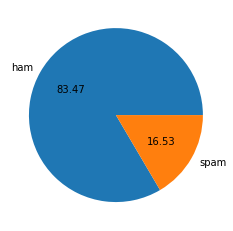

In [106]:
plt.pie(Y['label'].value_counts(),labels = ["ham","spam"],autopct = "%0.2f")

# EDA

In [107]:
df1[df1['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2500.000000,2500.000000,2500.0
mean,1233.672000,215.855600,1.0
std,3101.999287,517.157638,0.0
min,5.000000,1.000000,1.0
25%,360.000000,63.000000,1.0
50%,719.000000,127.000000,1.0
75%,1280.250000,229.000000,1.0
max,82994.000000,13309.000000,1.0


In [108]:
df1[df1['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,499.000000,499.000000,499.000000
mean,2313.669339,336.995992,0.995992
std,9817.766265,741.616480,0.063245
min,1.000000,0.000000,0.000000
25%,525.000000,90.000000,1.000000
50%,956.000000,162.000000,1.000000
75%,1941.000000,331.000000,1.000000
max,200408.000000,11602.000000,1.000000


In [109]:
df2[df2['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2363.000000,2363.000000,2363.000000
mean,3130.933559,630.559882,41.262802
std,3296.438063,685.165912,82.954977
min,17.000000,3.000000,1.000000
25%,1025.500000,204.000000,11.000000
50%,2060.000000,403.000000,20.000000
75%,3886.000000,784.000000,41.000000
max,28649.000000,6608.000000,1500.000000


In [110]:
df2[df2['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,468.000000,468.000000,468.000000
mean,3820.568376,920.474359,61.042735
std,5174.423061,1249.625313,85.467516
min,46.000000,13.000000,1.000000
25%,624.750000,136.750000,12.000000
50%,1728.500000,408.500000,25.000000
75%,5150.000000,1217.750000,75.000000
max,28571.000000,6586.000000,483.000000


In [111]:
import seaborn as sns

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


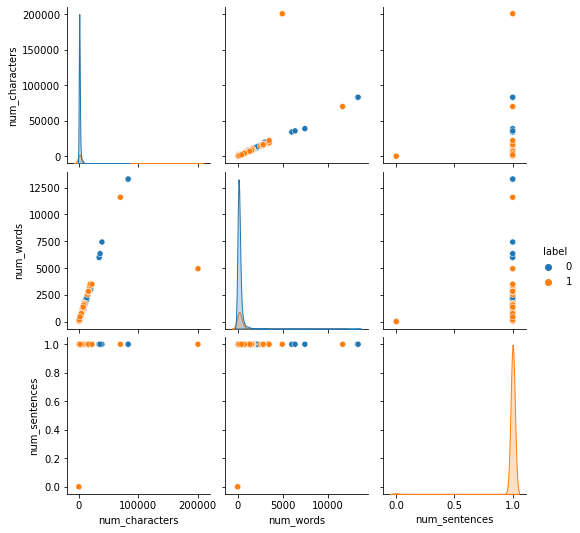

In [112]:
sns.pairplot(df1,hue='label')

<AxesSubplot:>

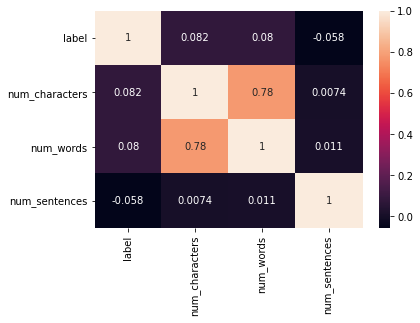

In [113]:
sns.heatmap(df1.corr(),annot=True)

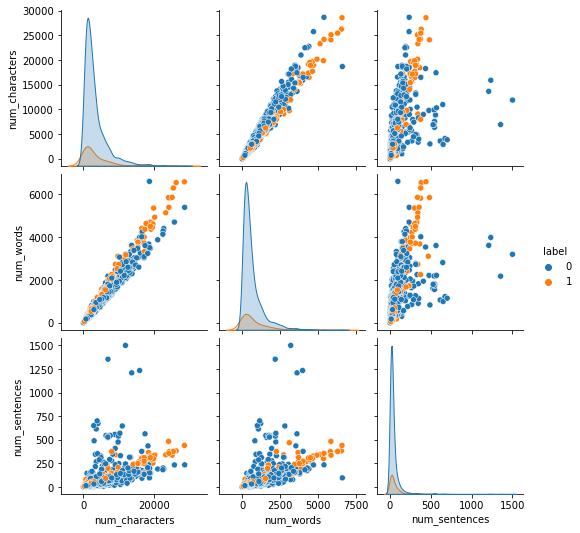

In [114]:
sns.pairplot(df2,hue='label')

<AxesSubplot:>

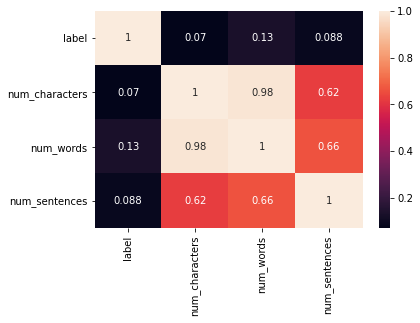

In [115]:
sns.heatmap(df2.corr(),annot=True)

# Model Classification

In [116]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

SVM_model = SVC()
DT_model = DecisionTreeClassifier()
RF_model = RandomForestClassifier()
MNB_model = MultinomialNB()


In [117]:
from sklearn.model_selection import KFold
folds = KFold(n_splits = 4,shuffle = True)

In [118]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()

In [119]:
x = X.to_numpy()
y = Y.to_numpy()

# Functions for Accuracy,Precision,recall

In [120]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
def acc_score(model,x_train,y_train,x_test,y_test):
    # training our model
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    # returning the scores
    return accuracy_score(y_predict,y_test)

In [121]:
def pre_score(model,x_train,y_train,x_test,y_test):
    # training our model
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    # returning the scores
    return precision_score(y_predict,y_test)

In [122]:
def rec_score(model,x_train,y_train,x_test,y_test):
    # training our model
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    # returning the scores
    return recall_score(y_predict,y_test)

In [123]:
SVM_acc_score = []
DT_acc_score = []
RF_acc_score = []
MNB_acc_score = []
SVM_pre_score = []
DT_pre_score = []
RF_pre_score = []
MNB_pre_score = []
SVM_rec_score = []
DT_rec_score = []
RF_rec_score = []
MNB_rec_score = []
print(len(x),len(y))

2999 2831


# K-Fold Cross Validation,CountVectorizer

In [124]:
def KFcrossvalidation(SVM_acc_score,DT_acc_score,RF_acc_score,MNB_acc_score,SVM_pre_score,DT_pre_score,RF_pre_score,MNB_pre_score,SVM_rec_score,DT_rec_score,RF_rec_score,MNB_rec_score,temp):
    for input_index,test_index in folds.split(y):
        train_split,test_split = temp[input_index],temp[test_index]
        train_set = pd.DataFrame(train_split,columns = ["message","label"])
        test_set = pd.DataFrame(test_split,columns = ["message","label"])
        x_train = v.fit_transform(train_set["message"].values.ravel())
        y_train = train_set["label"].astype("int")
        x_test = v.transform(test_set["message"])
        y_test = test_set["label"].astype("int")
        SVM_acc_score.append(acc_score(SVM_model,x_train,y_train,x_test,y_test))
        DT_acc_score.append(acc_score(DT_model,x_train,y_train,x_test,y_test))
        RF_acc_score.append(acc_score(RF_model,x_train,y_train,x_test,y_test))
        MNB_acc_score.append(acc_score(MNB_model,x_train,y_train,x_test,y_test))
        
        SVM_pre_score.append(pre_score(SVM_model,x_train,y_train,x_test,y_test))
        DT_pre_score.append(pre_score(DT_model,x_train,y_train,x_test,y_test))
        RF_pre_score.append(pre_score(RF_model,x_train,y_train,x_test,y_test))
        MNB_pre_score.append(pre_score(MNB_model,x_train,y_train,x_test,y_test))
        
        SVM_rec_score.append(rec_score(SVM_model,x_train,y_train,x_test,y_test))
        DT_rec_score.append(rec_score(DT_model,x_train,y_train,x_test,y_test))
        RF_rec_score.append(rec_score(RF_model,x_train,y_train,x_test,y_test))
        MNB_rec_score.append(rec_score(MNB_model,x_train,y_train,x_test,y_test))

In [125]:
KFcrossvalidation(SVM_acc_score,DT_acc_score,RF_acc_score,MNB_acc_score,SVM_pre_score,DT_pre_score,RF_pre_score,MNB_pre_score,SVM_rec_score,DT_rec_score,RF_rec_score,MNB_rec_score,x)
KFcrossvalidation(SVM_acc_score,DT_acc_score,RF_acc_score,MNB_acc_score,SVM_pre_score,DT_pre_score,RF_pre_score,MNB_pre_score,SVM_rec_score,DT_rec_score,RF_rec_score,MNB_rec_score,y)

In [126]:
print(SVM_acc_score,DT_acc_score,RF_acc_score,MNB_acc_score)

[0.9350282485875706, 0.9392655367231638, 0.9279661016949152, 0.9264497878359265, 0.923728813559322, 0.9392655367231638, 0.9350282485875706, 0.9561527581329562] [0.9689265536723164, 0.96045197740113, 0.961864406779661, 0.9646393210749646, 0.9491525423728814, 0.9646892655367232, 0.9576271186440678, 0.9717114568599717] [0.9675141242937854, 0.981638418079096, 0.9774011299435028, 0.9731258840169731, 0.96045197740113, 0.9731638418079096, 0.9703389830508474, 0.9759547383309759] [0.9858757062146892, 0.9872881355932204, 0.9901129943502824, 0.9872701555869873, 0.9901129943502824, 0.9929378531073446, 0.9901129943502824, 0.9900990099009901]


In [127]:
print(SVM_pre_score,DT_pre_score,RF_pre_score,MNB_pre_score)

[0.43209876543209874, 0.39436619718309857, 0.43333333333333335, 0.4157303370786517, 0.5583333333333333, 0.635593220338983, 0.648, 0.7047619047619048] [0.8641975308641975, 0.8732394366197183, 0.8, 0.8539325842696629, 0.8416666666666667, 0.8898305084745762, 0.904, 0.9047619047619048] [0.7160493827160493, 0.8873239436619719, 0.8444444444444444, 0.8314606741573034, 0.7916666666666666, 0.8135593220338984, 0.856, 0.8666666666666667] [0.8765432098765432, 0.8873239436619719, 0.9555555555555556, 0.898876404494382, 0.975, 0.9915254237288136, 0.984, 0.9904761904761905]


In [128]:
print(SVM_rec_score,DT_rec_score,RF_rec_score,MNB_rec_score)

[1.0, 1.0, 1.0, 1.0, 0.9852941176470589, 1.0, 0.9759036144578314, 1.0] [0.8641975308641975, 0.7560975609756098, 0.8181818181818182, 0.8409090909090909, 0.8571428571428571, 0.905982905982906, 0.905982905982906, 0.8818181818181818] [1.0, 1.0, 1.0, 0.9864864864864865, 1.0, 1.0, 0.9904761904761905, 1.0] [1.0, 0.984375, 0.9662921348314607, 1.0, 0.9669421487603306, 0.9669421487603306, 0.9609375, 0.9454545454545454]


In [129]:
def calculate_average(classifier_scores):
    avg = 0
    for i in classifier_scores:
        avg += i
    return (avg/len(classifier_scores))

# F1 score 

In [130]:
def calculate_f1score(precision,recall):
    return 2*((precision*recall)/(precision+recall))

In [131]:
SVM_acc_average = 0
DT_acc_average = 0
RF_acc_average = 0
MNB_acc_average = 0
SVM_acc_average = calculate_average(SVM_acc_score)
DT_acc_average = calculate_average(DT_acc_score)
RF_acc_average = calculate_average(RF_acc_score)
MNB_acc_average = calculate_average(MNB_acc_score)

In [132]:
print(SVM_acc_average,DT_acc_average,RF_acc_average,MNB_acc_average)

0.9353606289805736 0.9623828302927145 0.9724486371155275 0.9892262304317597


In [133]:
SVM_pre_average = 0
DT_pre_average = 0
RF_pre_average = 0
MNB_pre_average = 0
SVM_pre_average = calculate_average(SVM_pre_score)
DT_pre_average = calculate_average(DT_pre_score)
RF_pre_average = calculate_average(RF_pre_score)
MNB_pre_average = calculate_average(MNB_pre_score)

In [134]:
print(SVM_pre_average,DT_pre_average,RF_pre_average,MNB_pre_average)

0.5277771364326754 0.8664535789570907 0.8258963875433751 0.944912590974182


In [135]:
SVM_rec_average = 0
DT_rec_average = 0
RF_rec_average = 0
MNB_rec_average = 0
SVM_rec_average = calculate_average(SVM_rec_score)
DT_rec_average = calculate_average(DT_rec_score)
RF_rec_average = calculate_average(RF_rec_score)
MNB_rec_average = calculate_average(MNB_rec_score)

In [136]:
print(SVM_rec_average,DT_rec_average,RF_rec_average,MNB_rec_average)

0.9951497165131112 0.853789106482196 0.9971203346203346 0.9738679347258334


In [137]:
SVM_f1score = 0
DT_f1score = 0
RF_f1score = 0
MNB_f1score = 0
SVM_f1score_average = calculate_f1score(SVM_pre_average,SVM_rec_average)
DT_f1score_average = calculate_f1score(DT_pre_average,DT_rec_average)
RF_f1score_average = calculate_f1score(RF_pre_average,RF_rec_average)
MNB_f1score_average = calculate_f1score(MNB_pre_average,RF_rec_average)

In [138]:
print(SVM_f1score_average,DT_f1score_average,RF_f1score_average,MNB_f1score_average)

0.6897472018267385 0.860074724627782 0.9034673925882096 0.970314711436429


In [139]:
from sklearn.model_selection import train_test_split
vk = CountVectorizer()
model = MultinomialNB()
df3 = pd.read_csv("SpamAssassin.csv")
X_con = df3["email"]  
Y_con = df3["label"] 
X_train, X_test, y_train, y_test = train_test_split(X_con,Y_con, test_size=0.4, random_state = 4)
x_train = vk.fit_transform(X_train.values.ravel().astype('U'))
Y_train = y_train.astype("int")
x_test =  vk.transform(X_test)
model.fit(x_train,Y_train)

MultinomialNB()

# Confusion Matrix

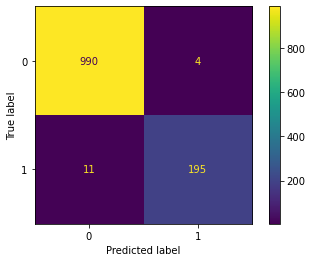

In [140]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,x_test,y_test)

# Comparision of all the classifiers based on various measures

In [141]:
data = [['SVM',SVM_pre_average,SVM_rec_average,SVM_f1score_average,SVM_acc_average],['DT',DT_pre_average,DT_rec_average,DT_f1score_average,DT_acc_average],['RF',RF_pre_average,RF_rec_average,RF_f1score_average,RF_acc_average],['MNB',MNB_pre_average,MNB_rec_average,MNB_f1score_average,MNB_acc_average]]
table = pd.DataFrame(data, columns = ['Classifier_name', 'Precision', "Recall", "F1Score", "Accuracy"]) 

In [142]:
table.head()

,Classifier_name,Precision,Recall,F1Score,Accuracy
0,SVM,0.527777,0.995150,0.689747,0.935361
1,DT,0.866454,0.853789,0.860075,0.962383
2,RF,0.825896,0.997120,0.903467,0.972449
3,MNB,0.944913,0.973868,0.970315,0.989226


<AxesSubplot:>

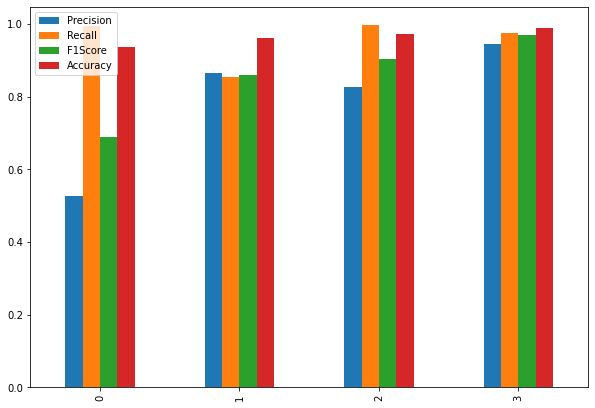

In [143]:
table.plot.bar(figsize = (10,7))

# Pickling the model parameters for making of GUI

In [144]:
import pickle
pickle.dump(v,open('vectorizer.pkl','wb'))
pickle.dump(MNB_model,open('model.pkl','wb'))